# Self Organizing Maps (SOM)
### Dataset: [Dry_Bean_Dataset.xlsx](../../input/Dry_Bean_Dataset_Citation_Request.txt)


<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom




<a id="2"></a>
## Loading dataset

In [2]:
filename = '../../input/Dry_Bean_Dataset.xlsx'
df = pd.read_excel(filename)
df_numeric = df.select_dtypes(include=[np.number])


# convert the filtered numeric DataFrame to a NumPy array
dataset_1 = df_numeric.to_numpy()

# apply standardization
epsilon = 1e-8
dataset_1 = (dataset_1 - np.mean(dataset_1, axis=0)) / (np.std(dataset_1, axis=0) + epsilon)


# print the shape and the minimum values for each column
print(dataset_1.shape)
print(np.min(dataset_1, axis=0))

(13611, 16)
[ -1.11271916  -1.54258281  -1.59340703  -1.77364529  -2.26365481
  -5.78209734  -1.11118419  -1.55167789  -3.96087928 -14.56942294
  -6.44620846  -2.58116691  -3.35612349  -1.93295838  -2.35625468
 -10.85033768]


<a id="3"></a>
## Standardize the data

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.7040959197808996
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.4483740937370144
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.7356796852176941
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.5518181048033144
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.754669862739707
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.7059884056646704
Best Parameters Found:
{'sigma': 1.0, 'learning_rate': 0.5, 'neighborhood_function': 'gaussian', 'topology': 'rectangular'}
Quantization Error: 1.4483740937370144
Topographic Error: 0.37410917640144004
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.4483740937370144


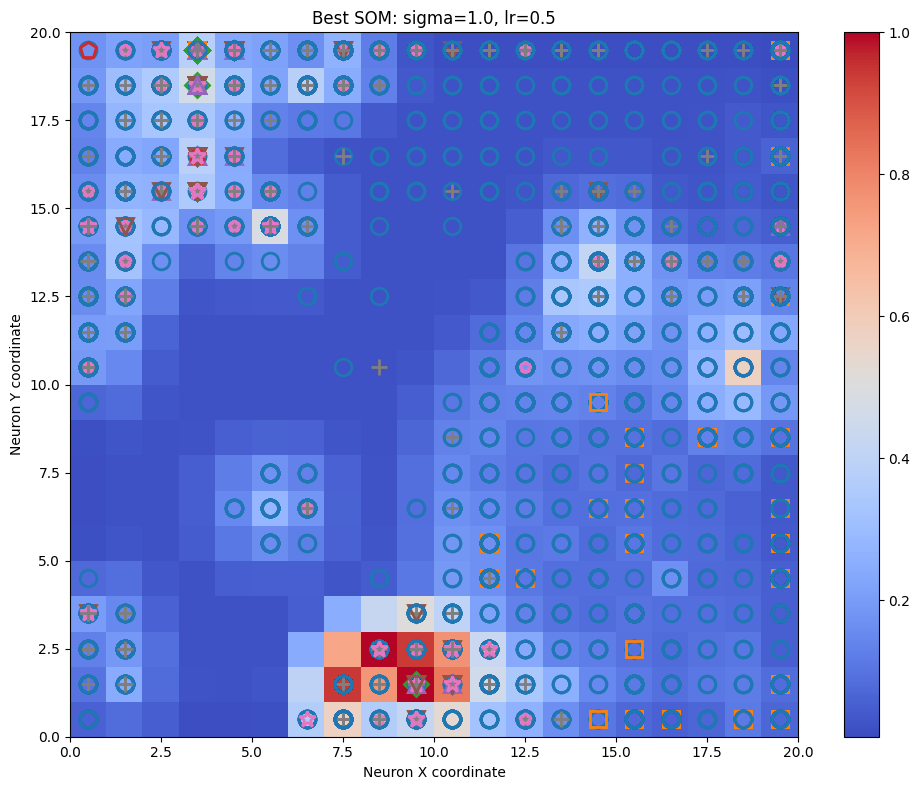

In [3]:
training_data = dataset_1[:, :-1] 
target = np.array(dataset_1[:, -1], dtype=np.uint8)  # ensure this is correct based on your data's last column


# define SOM parameters to try
parameters_to_try = [
    {"sigma": 0.5, "learning_rate": 0.5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": 1.0, "learning_rate": 0.5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": 0.5, "learning_rate": 0.1, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": 1.0, "learning_rate": 0.1, "neighborhood_function": "gaussian", "topology": "hexagonal"},
    {"sigma": 0.5, "learning_rate": 0.3, "neighborhood_function": "mexican_hat", "topology": "rectangular"},
    {"sigma": 1.0, "learning_rate": 0.3, "neighborhood_function": "mexican_hat", "topology": "hexagonal"},
    # additional parameter sets can be defined here
]

# function to evaluate SOM
def evaluate_som(som, data):
    quantization_error = som.quantization_error(data)
    topographic_error = som.topographic_error(data)
    return quantization_error, topographic_error

# results holder
results = []

# train SOMs with different parameters and evaluate them
for params in parameters_to_try:
    som = MiniSom(20, 20, training_data.shape[1], random_seed=42, **params)
    som.pca_weights_init(training_data)
    som.train(training_data, 5000, verbose=True)

    q_error, t_error = evaluate_som(som, training_data)
    results.append((params, q_error, t_error))

# select the best parameters based on the lowest quantization error
best_params, best_q_error, best_t_error = min(results, key=lambda x: x[1])

print("Best Parameters Found:")
print(best_params)
print("Quantization Error:", best_q_error)
print("Topographic Error:", best_t_error)

# train SOM with the best parameters
best_som = MiniSom(20, 20, training_data.shape[1], random_seed=42, **best_params)
best_som.pca_weights_init(training_data)
best_som.train(training_data, 5000, verbose=True)

# visualize the best SOM
plt.figure(figsize=(10, 8))
plt.pcolor(best_som.distance_map().T, cmap='coolwarm')
plt.colorbar()

# create markers and colors for each class
markers = ['o', 's', 'D', 'p', '^', 'v', '*', '+']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

# plot the markers on the best SOM
for cnt, xx in enumerate(training_data):
    w = best_som.winner(xx)
    marker_index = target[cnt] % len(markers)
    color_index = target[cnt] % len(colors)
    plt.plot(w[0]+.5, w[1]+.5, markers[marker_index], markerfacecolor='None',
             markeredgecolor=colors[color_index], markersize=12, markeredgewidth=2)

# add title and labels
plt.title(f'Best SOM: sigma={best_params["sigma"]}, lr={best_params["learning_rate"]}')
plt.xlabel('Neuron X coordinate')
plt.ylabel('Neuron Y coordinate')

# adjust layout and display the plot
plt.tight_layout()
plt.show()

### Component Planes


This plot shows the SOM's distance map, often visualized as a heatmap. The distance map represents the distances between neighboring neurons' weights, giving an idea of how similar or different adjacent neurons are.
Superimposed on this map are the data points, where each point's position corresponds to the neuron to which it is most similar (its "winning" neuron).
The points are colored based on their class labels, offering a visual representation of how different classes are distributed across the map.

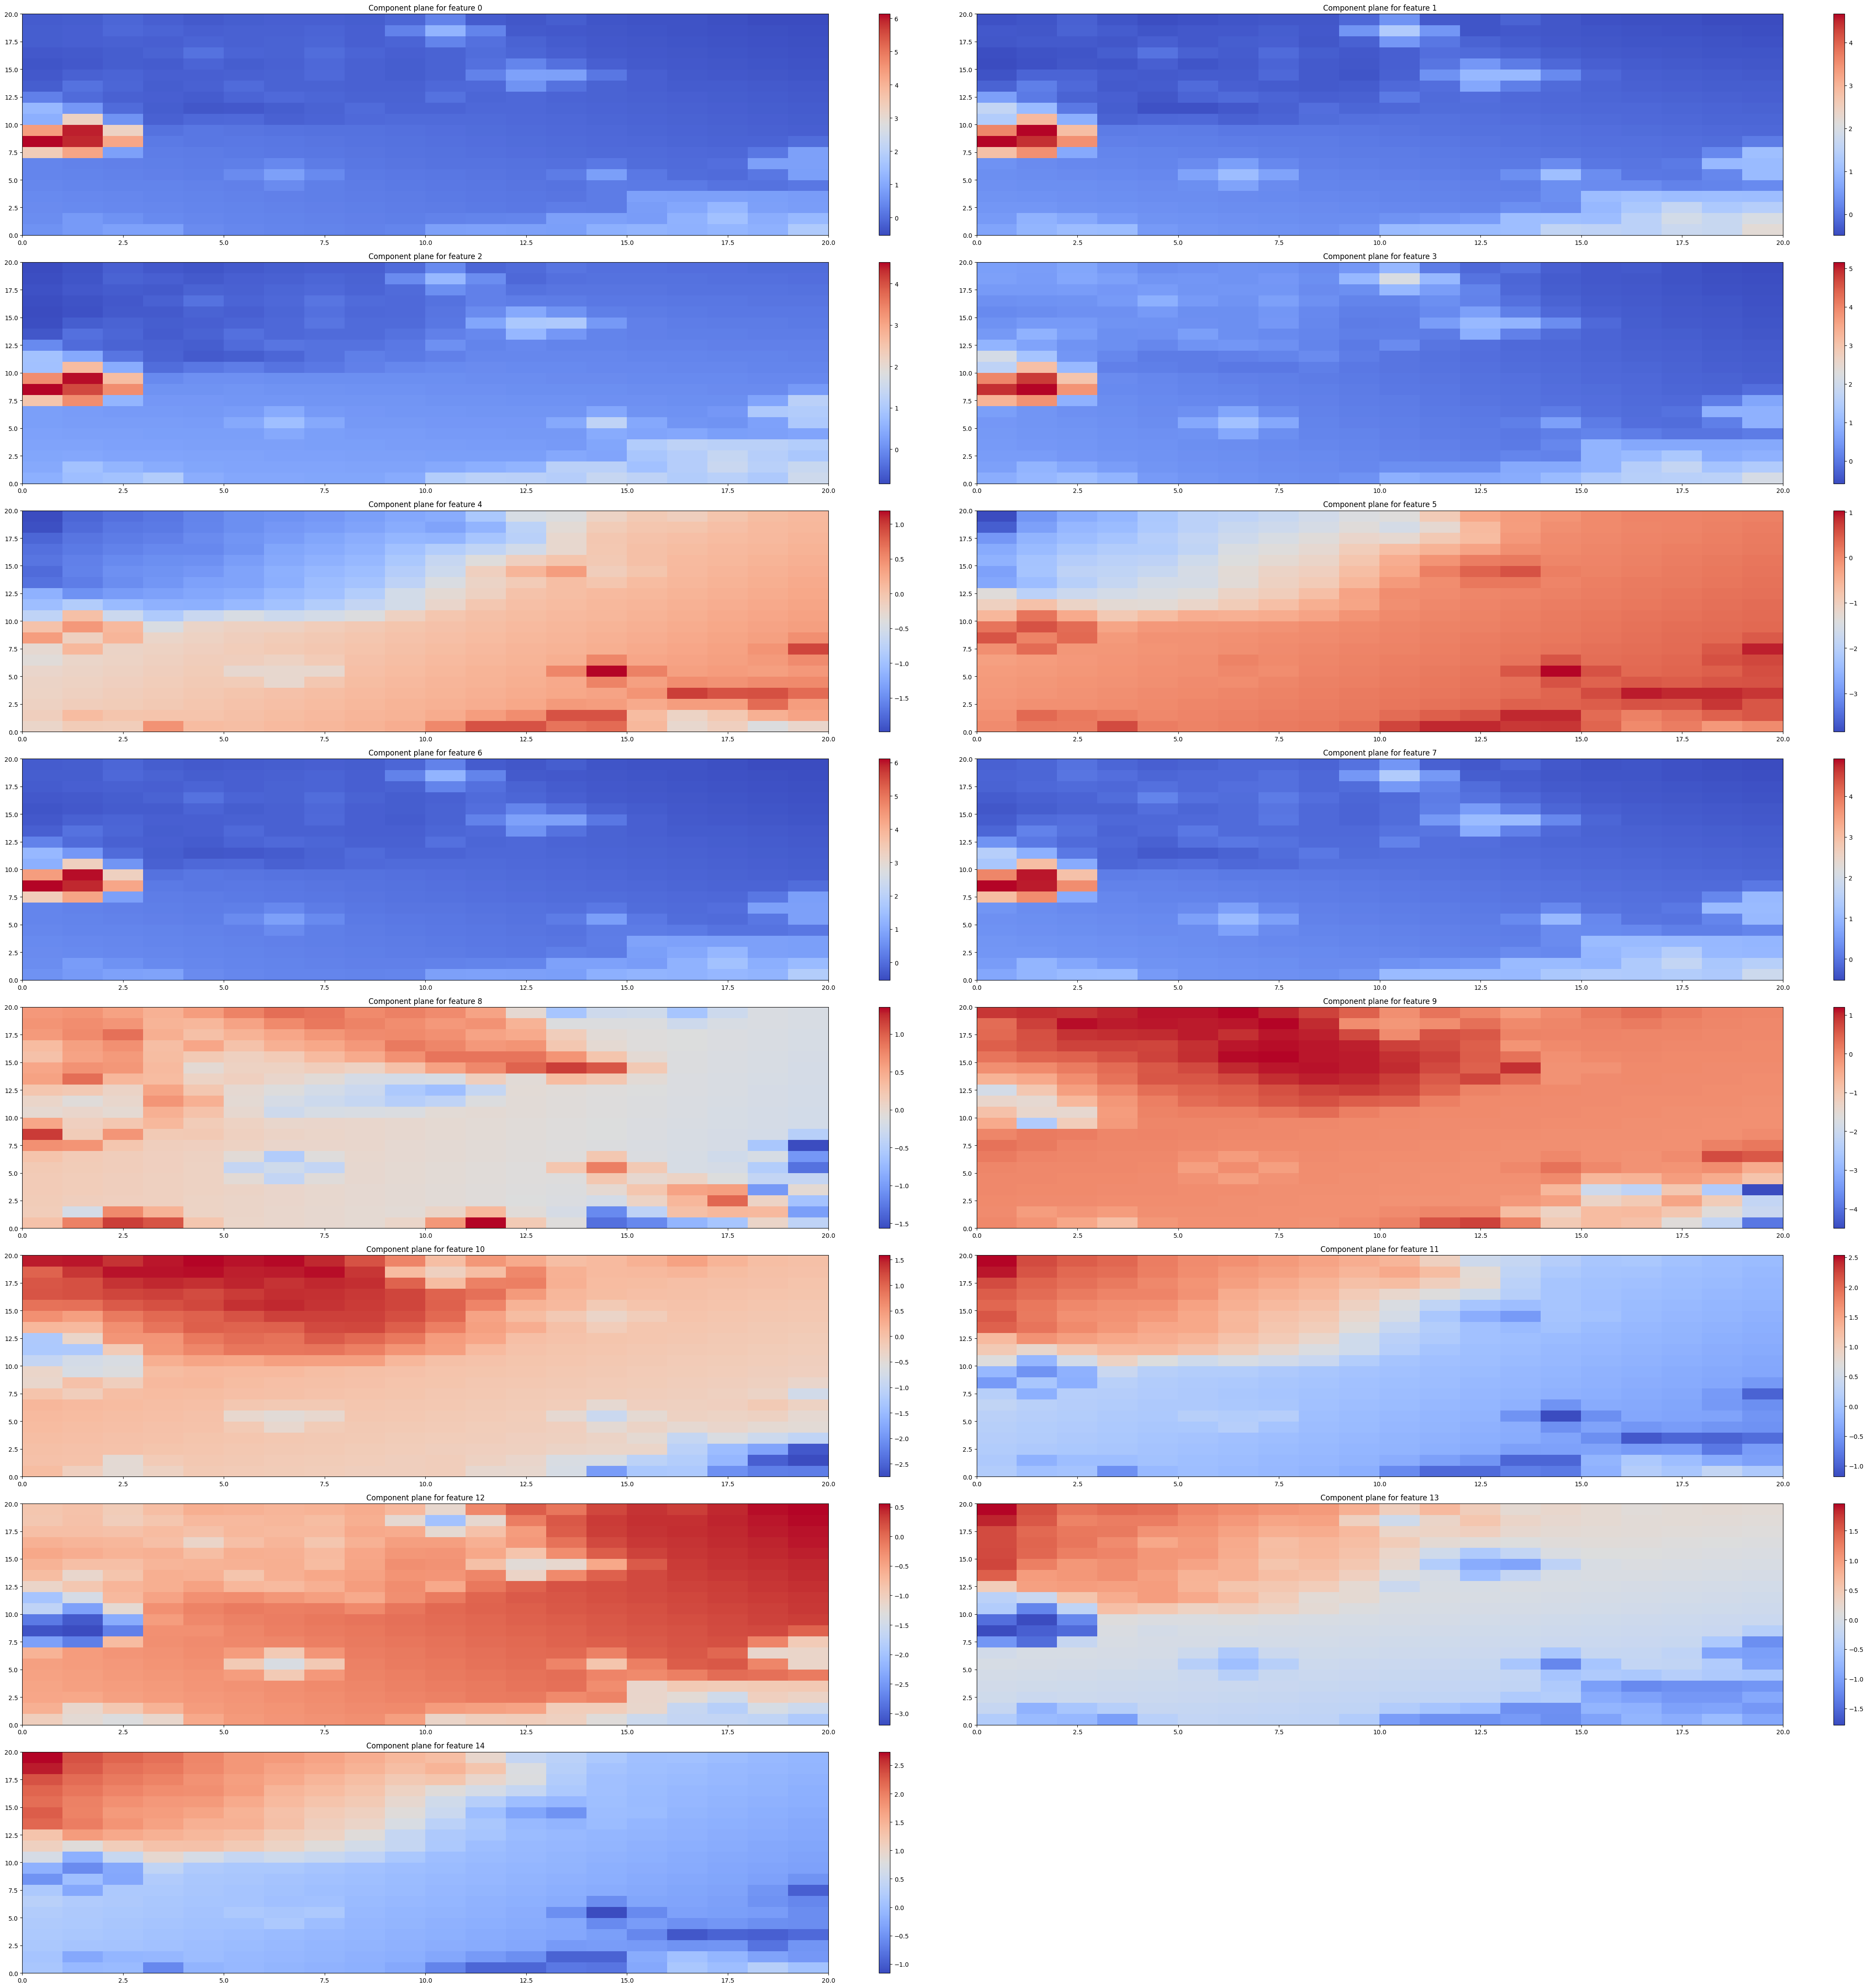

In [4]:
# plot the component planes for all features
num_features = training_data.shape[1]
plt.figure(figsize=(num_features*3, num_features*3))
for i in range(num_features):
    plt.subplot((num_features+1)//2, 2, i+1)  # adjust the layout based on the number of features
    plt.title(f'Component plane for feature {i}')
    plt.pcolor(best_som.get_weights()[:, :, i], cmap='coolwarm')  # plotting the component plane for each feature
    plt.colorbar()
plt.tight_layout()
plt.show()
